# Gradiente Descendente


Etapas manuais para criação do Gradiente Descendente

Formulação dos dados sintéticos:

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [16]:
df=pd.DataFrame({"Weight":[0.5,1.9,3.2],"Height":[1.4,2.3,2.9]})

In [17]:
df

,Weight,Height
0,0.5,1.4
1,1.9,2.3
2,3.2,2.9


<AxesSubplot:xlabel='Weight', ylabel='Height'>

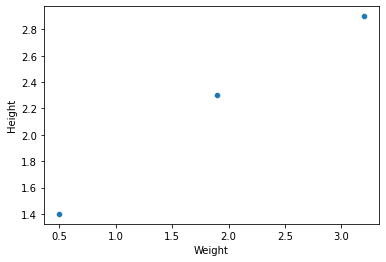

In [18]:
sns.scatterplot(data=df,x='Weight',y='Height')

y = wx + b

w = coeficiênte ângular
b = ponto de intersecção

In [205]:
# Fazendo um Looping


#Definição das variáveis

lr=0.001
epochs = 5000
count=0

#Simplificando os DF em Variáveis.

y = df['Height']  # Valor real de y
y_hat = df_pred=pd.DataFrame()  # valor de predição da minha função regressão
x = df['Weight'] # Valor explicativos, fixos. Dado Weight quero prever Height


#Random parâmetros pra curva inicial:

w=0
b=0

#Listas para serem utilizadas em gráficos e testes

dJ_dw_list=[]
dJ_db_list=[]
count_list=[]
loss_list=[]
hist_w=[]
hist_b=[]

while (count < epochs):
    
    
    #Predição da Função Linear 
    
    y_hat = w*x + b

    # y_hat
    
    
    loss_func = ((y-y_hat)**2)/(y.count()) # calc loss funct apenas para plotar.
    loss_list.append(loss_func.sum())
    
    #Gradiente from Loss Function(MSE) ...

    
    dJ_dw = -2*(y-y_hat)*x # Derivada parcial em relação ao w
    
    dJ_db = -2*(y-y_hat) # Derivada parcial em relação ao b
    
   #print('dJ_dw:  ',(dJ_dw).sum())
   #print('dJ_db:  ',(dJ_db).sum())
    
    dJ_dw_list.append(dJ_dw.sum())
    
    dJ_db_list.append(dJ_db.sum())
    
    ## Criando uma lista para posteriormente plotar o gráfico;
    
    #Step Size = dJ_dw(db)*Learning Rate

    w = w - dJ_dw.sum()*lr
    b = b - dJ_db.sum()*lr
    
    hist_w.append(w)
    hist_b.append(b)
    
    count+=1
    count_list.append(count)
    
print('w - slope  :',w)
print('b - intercept :',b)

#Função para tornar fácil o predict

def predict(x):
    
    z=w*x+b
    return z

w - slope  : 0.5570948387501143
b - intercept : 1.159864954056225


<AxesSubplot:xlabel='Weight', ylabel='Height'>

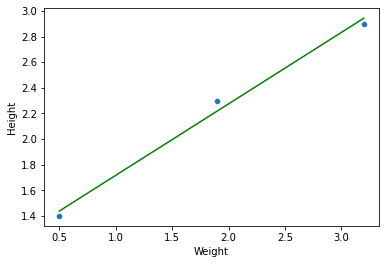

In [181]:
sns.scatterplot(data=df,x='Weight',y='Height')
sns.lineplot(x= df['Weight'], y=predict(df['Weight']),color='green')

In [218]:
df_predict=pd.DataFrame({'loss_func':loss_list,'grad_slope':dJ_dw_list,'grad_intercept':dJ_db_list,'slope':hist_w,'intercept':hist_b,'epochs':count_list})
df_predict.tail(10)

,loss_func,grad_slope,grad_intercept,slope,intercept,epochs
4990,0.003318,0.000569,-0.001366,0.557100,1.159853,4991
4991,0.003318,0.000569,-0.001364,0.557099,1.159854,4992
4992,0.003318,0.000568,-0.001363,0.557099,1.159855,4993
4993,0.003318,0.000567,-0.001361,0.557098,1.159857,4994
4994,0.003318,0.000566,-0.001359,0.557098,1.159858,4995
4995,0.003318,0.000566,-0.001357,0.557097,1.159860,4996
4996,0.003318,0.000565,-0.001355,0.557097,1.159861,4997
4997,0.003318,0.000564,-0.001353,0.557096,1.159862,4998
4998,0.003318,0.000563,-0.001352,0.557095,1.159864,4999
4999,0.003318,0.000563,-0.001350,0.557095,1.159865,5000


<AxesSubplot:xlabel='epochs', ylabel='slope'>

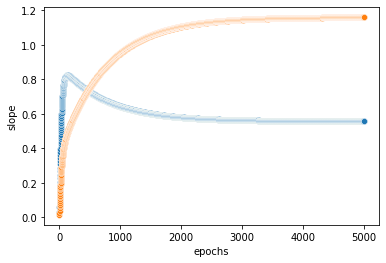

In [210]:
# Conforme as iterações acontecem o valor do slope e intercept se convergem

sns.scatterplot(x=df_predict['epochs'],y=df_predict['slope'])
sns.scatterplot(x=df_predict['epochs'],y=df_predict['intercept'])

<AxesSubplot:xlabel='grad_slope', ylabel='loss_func'>

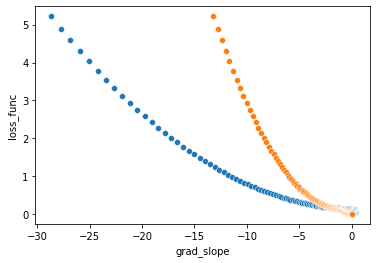

In [262]:
sns.scatterplot(x=df_predict['grad_slope'],y=df_predict['loss_func'] )
sns.scatterplot(x=df_predict['grad_intercept'],y=df_predict['loss_func'])


<AxesSubplot:xlabel='epochs', ylabel='grad_slope'>

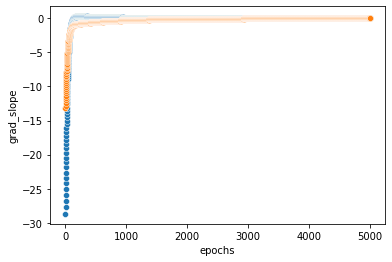

In [209]:
sns.scatterplot(x=df_predict['epochs'],y=df_predict['grad_slope'])
sns.scatterplot(x=df_predict['epochs'],y=df_predict['grad_intercept'])

<AxesSubplot:xlabel='epochs', ylabel='loss_func'>

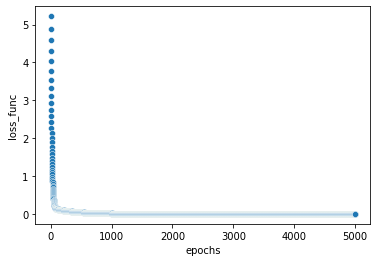

In [246]:
sns.scatterplot(x=df_predict['epochs'],y=df_predict['loss_func'])



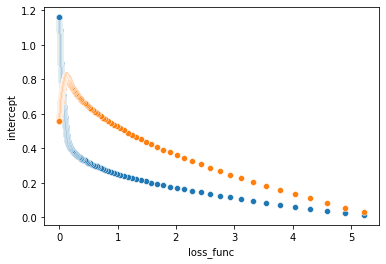

In [247]:
# Prospecção 2-D de onde encontrariamos para loss_func mínima os valores de intercept e slope.

sns.scatterplot(x=df_predict['loss_func'],y=df_predict['intercept'])
sns.scatterplot(x=df_predict['loss_func'],y=df_predict['slope'])
filename='Gradient_Descent.png'
plt.savefig(filename, dpi=96)

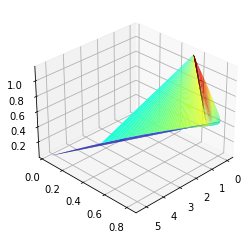

In [248]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df_predict['loss_func'],df_predict['slope'], df_predict['intercept'], cmap=plt.cm.jet, linewidth=0.3)

# Rotate it
ax.view_init(30,45)
plt.show()




C:\Users\rodri\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


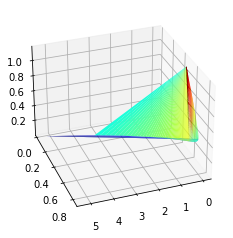

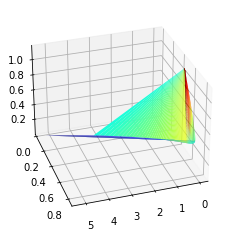

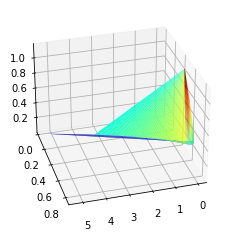

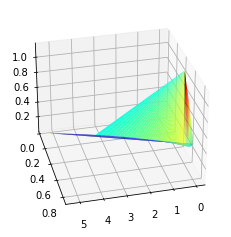

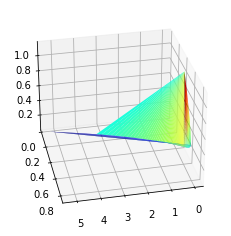

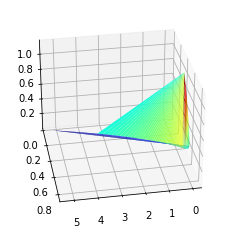

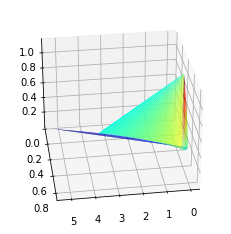

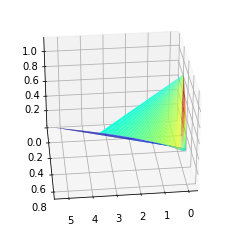

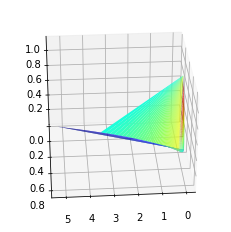

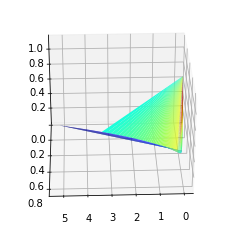

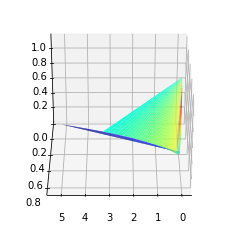

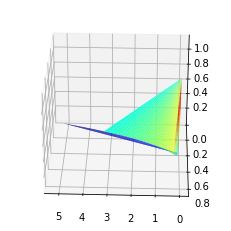

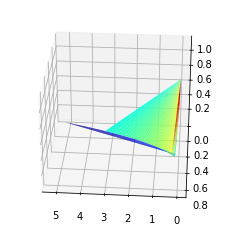

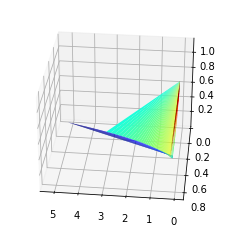

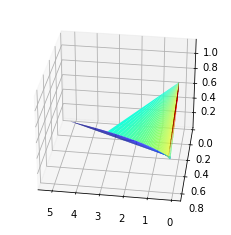

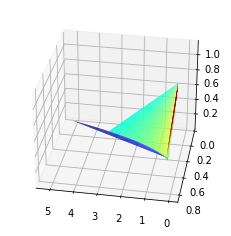

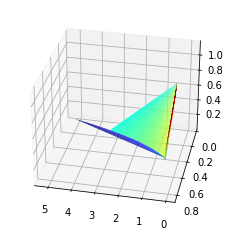

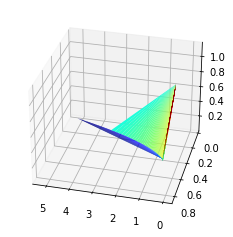

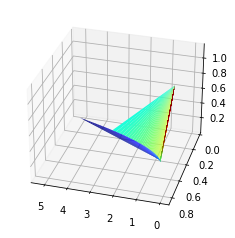

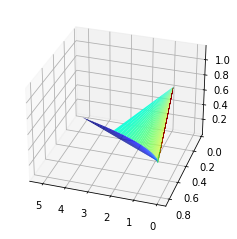

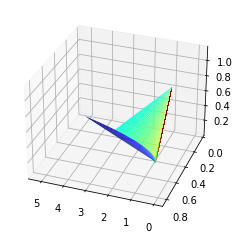

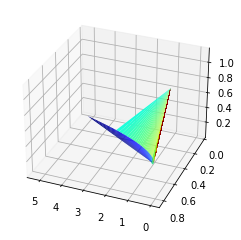

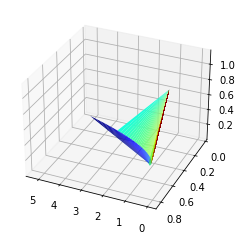

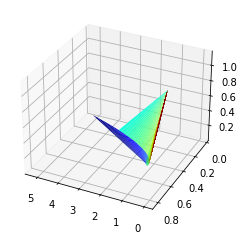

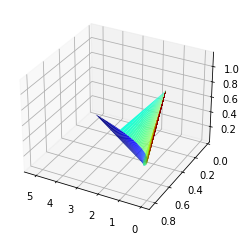

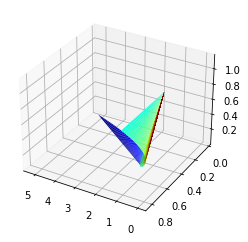

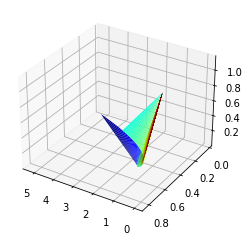

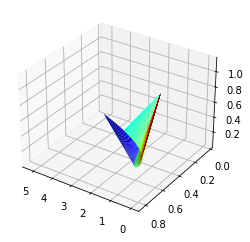

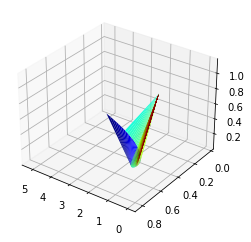

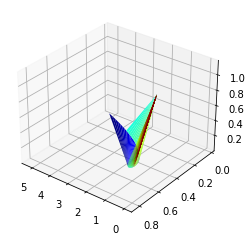

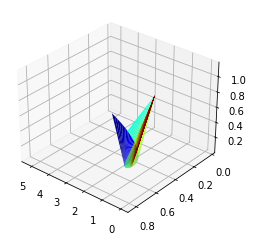

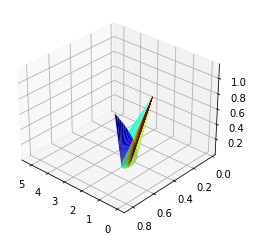

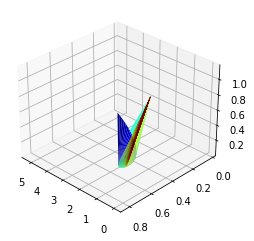

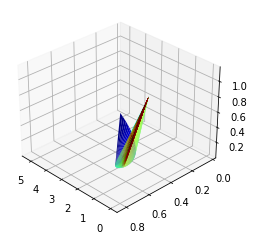

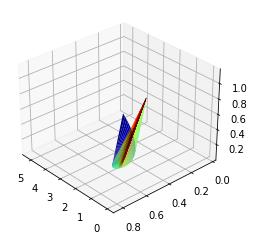

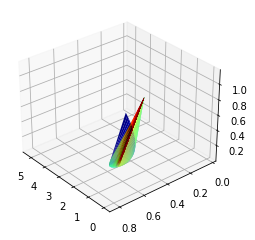

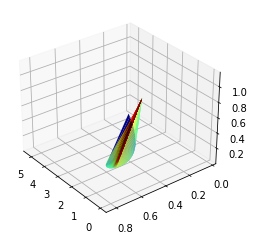

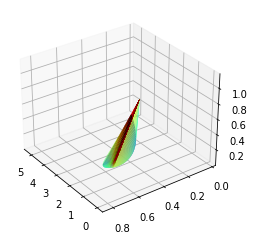

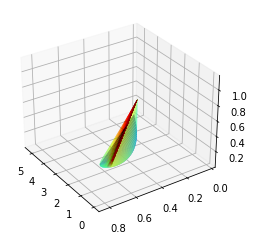

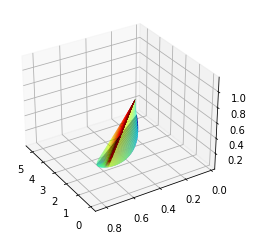

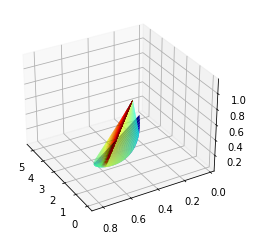

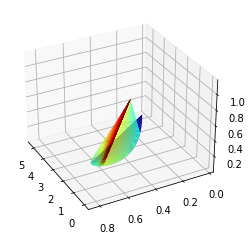

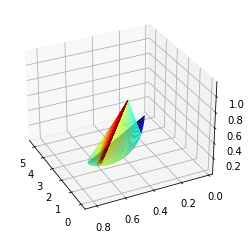

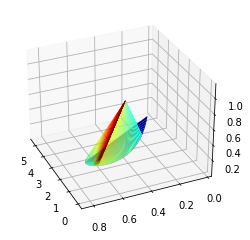

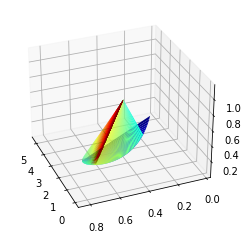

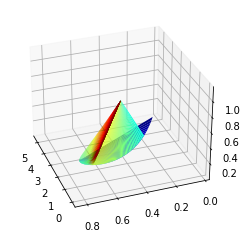

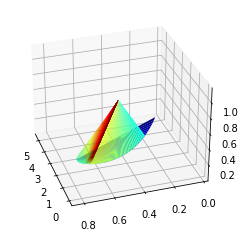

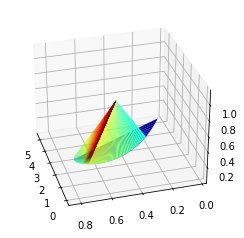

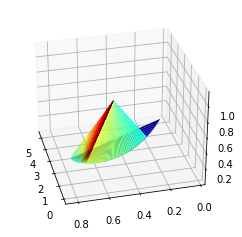

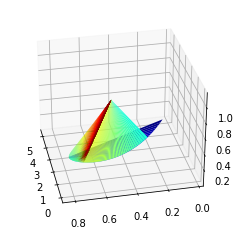

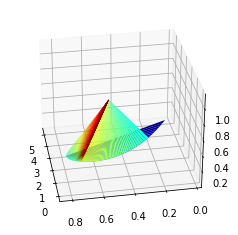

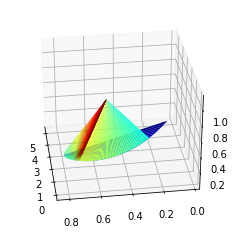

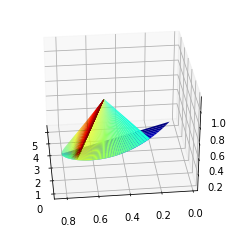

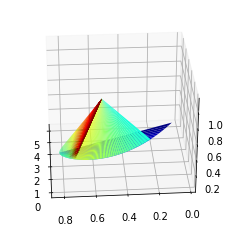

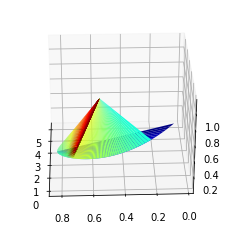

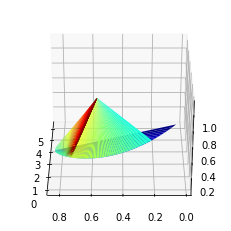

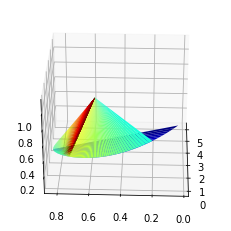

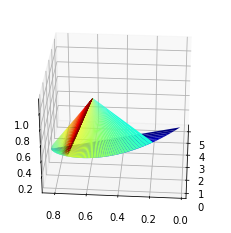

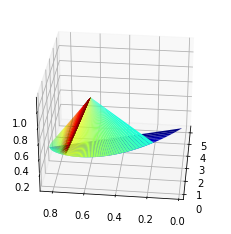

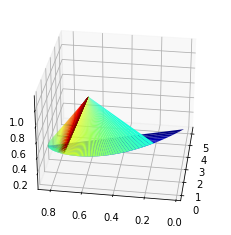

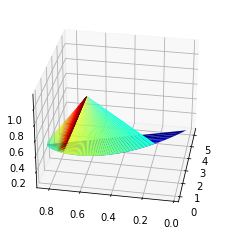

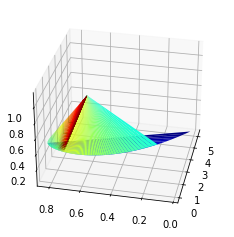

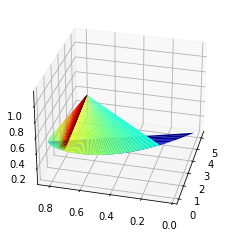

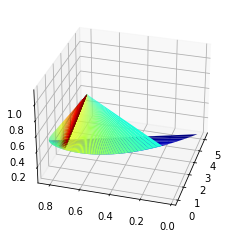

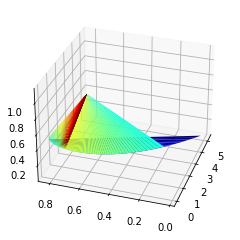

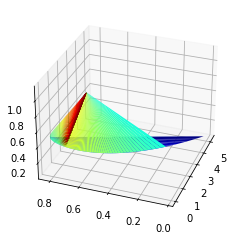

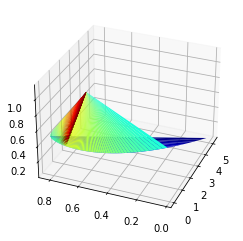

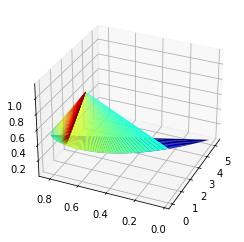

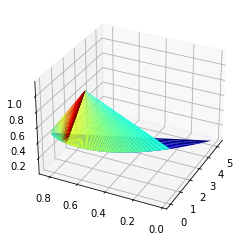

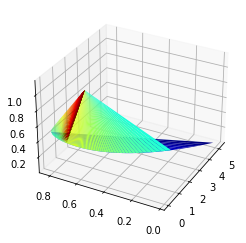

In [212]:
# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):
 
    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df_predict['loss_func'],df_predict['slope'], df_predict['intercept'], cmap=plt.cm.jet, linewidth=0.3)
     
    # Set the angle of the camera
    ax.view_init(30,angle)
     
    # Save it
    filename='PNG/Gradient_Descent'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
#Then use image magic to transform all the png files into an GIF file.

# Then use image magick (this is bash, not python)
#convert -delay 50 Volcano*.png animated_volcano.gif
